```yaml
#%mldev nb_context

pipeline:
  - imports
  - def_f
  - make_data
  - plot_data
  - list_models
  - mixture
  - data
  - fit
  - weights
  - imports2
  - params
  - fig_saved
  - zeros
  - new_plot
  - real
  - mixture_2
  - new_weights
  - pylab
```

In [1]:
!git clone https://github.com/andriygav/MixtureLib.git
!python3 -m pip install MixtureLib/src/.

from mixturelib.local_models import EachModelLinear
from mixturelib.hyper_models import HyperExpertNN, HyperModelDirichlet
from mixturelib.mixture import MixtureEM

import matplotlib.pyplot as plt
from matplotlib import gridspec
import pylab
from sklearn import metrics


from tqdm import tqdm_notebook as tqdm
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

#%mldev imports

Cloning into 'MixtureLib'...
remote: Enumerating objects: 1595, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 1595 (delta 69), reused 101 (delta 51), pack-reused 1441
Receiving objects: 100% (1595/1595), 9.06 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (882/882), done.
Processing ./MixtureLib/src
  Created wheel for mixturelib: filename=mixturelib-0.4.0-cp37-none-any.whl size=13739 sha256=d90bbe6ca5c14f69108c8611f5e4ed6a726182494474640f7cf75635e14bb50a
  Stored in directory: /tmp/pip-ephem-wheel-cache-04c0mgk1/wheels/8f/0e/0e/7b633cbf34c93d96d5b40677655ae6cda78087b2231b3cb1dc
Successfully built mixturelib


device(type='cpu')

In [2]:
def f_1(x):
    return 20*x[0] + np.random.randn()

def f_2(x):
    return 50*x[0] + np.random.randn()
nn = 200 #число объектов каждого класса
n = 2 #общее число признаков

#%mldev def_f

###Заполнение случайными признаками

In [3]:
nn = 200 
#порождение данных со случайным заполнением признака
x1 = np.random.randn(nn, 1)
x2 = np.random.randn(nn, 1)
y1 = np.array([f_1(x) for x in x1])
y2 = np.array([f_2(x) for x in x2])

#две выборки, когда признаки заполняются случайно
X1 = np.hstack([x1, np.random.normal(0, 0.2, (nn, 1))]) 
X2 = np.hstack([np.random.normal(0, 0.2, (nn, 1)), x2])

X = np.vstack([X1, X2])
Y = np.hstack([y1, y2])

#%mldev make_data

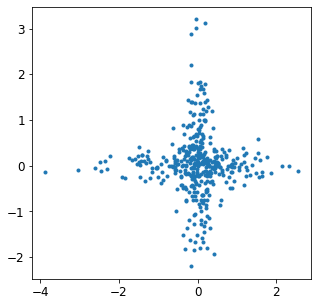

In [4]:
FONT_SIZE = 12

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
plt.rcParams['legend.fontsize'] = FONT_SIZE
plt.rcParams['axes.titlesize']=FONT_SIZE
plt.rcParams['axes.labelsize']=FONT_SIZE
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['font.size'] = FONT_SIZE
##############################################

_ = plt.plot(X[:, 0], X[:, 1], '.')

#%mldev plot_data

In [5]:
torch.random.manual_seed(42)
first_model = EachModelLinear(input_dim=2)
second_model = EachModelLinear(input_dim=2)

list_of_models = [first_model, second_model]

#%mldev list_models

In [6]:
HpMd = HyperExpertNN(input_dim=2, hidden_dim=5,output_dim=2, epochs=1000)

mixture = MixtureEM(HyperParameters={'beta': 1.},
                    HyperModel=HpMd,
                    ListOfModels=list_of_models,
                    model_type='sample')
#%mldev mixture

In [7]:
real_second_w = np.array([[10.], [0.]])
real_first_w = np.array([[0.], [50.]])
X_tr = torch.FloatTensor(X)
Y_tr = torch.FloatTensor(Y).view([-1,1])

#%mldev data

In [8]:
mixture.fit(X_tr, Y_tr)
predicted_first_w = mixture.ListOfModels[0].W.numpy()
predicted_second_w = mixture.ListOfModels[1].W.numpy()
weights = []
weights.append([predicted_first_w[0][0], predicted_first_w[1][0]])
weights.append([predicted_second_w[0][0], predicted_second_w[1][0]])

#%mldev fit

In [9]:
print(weights[0], weights[1])
w1 = weights[0][0]
w2 = weights[1][1]

#%mldev weights

[23.689787, 47.06551] [12.519998, 48.897453]


In [10]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pylab
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#%mldev imports2

In [11]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 40

#%mldev params

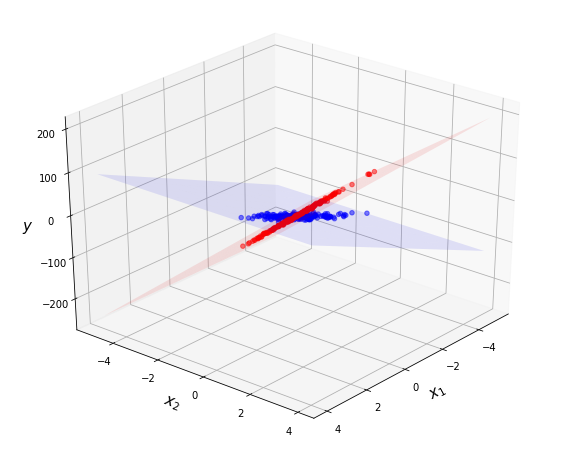

In [12]:
fig = plt.figure(figsize=(10, 8))

b = [0 for i in range(n)]

ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))

z1 = 0.0001 * np.array(xx) + w2* np.array(yy)
z2 = w1 * np.array(xx) + 0.0001*np.array(yy)
ax.scatter(X[0:200, 0],X[0:200, 1], y1, alpha=0.5, color='blue')
ax.scatter(X[200:400, 0],X[200:400, 1], y2, alpha=0.5, color='red')
#ax.scatter(y, x, z2, color='red')
#ax.scatter(y11, x, z2, color='red')
#ax.scatter(y22, x, z2, color='red')
ax.plot_surface(xx, yy, z1, alpha = 0.1, color = 'red')
ax.plot_surface(xx, yy, z2, alpha = 0.1, color = 'blue')
ax.view_init(30,40)
ax.set_xlabel('$x_1$', fontsize=15, fontweight="bold")
ax.set_ylabel('$x_2$', fontsize=15, fontweight="bold")
ax.set_zlabel('$y$', fontsize=15, fontweight="bold")
#ax.set_title('', fontsize=15, fontweight="bold")
pylab.savefig('experiment2_random.pdf')

#%mldev fig_saved

### Заполнение нулями

In [13]:
nn = 200 
#порождение данных с нулевым заполнением
x1 = np.random.randn(nn, 1)
x2 = np.random.randn(nn, 1)
y1 = np.array([f_1(x) for x in x1])
y2 = np.array([f_2(x) for x in x2])

#две выборки, когда признаки заполняются случайно
X1 = np.hstack([x1, np.zeros((nn,1))]) 
X2 = np.hstack([np.zeros((nn,1)), x2])

X = np.vstack([X1, X2])
Y = np.hstack([y1, y2])

#%mldev zeros

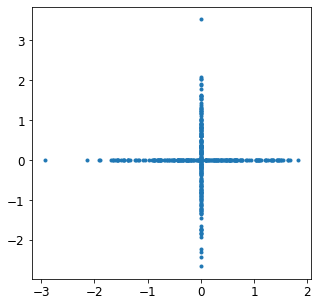

In [14]:
FONT_SIZE = 12

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = FONT_SIZE
plt.rcParams['ytick.labelsize'] = FONT_SIZE
plt.rcParams['legend.fontsize'] = FONT_SIZE
plt.rcParams['axes.titlesize']=FONT_SIZE
plt.rcParams['axes.labelsize']=FONT_SIZE
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['font.size'] = FONT_SIZE
##############################################

_ = plt.plot(X[:, 0], X[:, 1], '.')

#%mldev new_plot

In [15]:
real_second_w = np.array([[10.], [0.]])
real_first_w = np.array([[0.], [50.]])
X_tr = torch.FloatTensor(X)
Y_tr = torch.FloatTensor(Y).view([-1,1])

#%mldev real

In [16]:
mixture.fit(X_tr, Y_tr)
predicted_first_w = mixture.ListOfModels[0].W.numpy()
predicted_second_w = mixture.ListOfModels[1].W.numpy()
weights = []
weights.append([predicted_first_w[0][0], predicted_first_w[1][0]])
weights.append([predicted_second_w[0][0], predicted_second_w[1][0]])

#%mldev mixture_2

In [17]:
print(weights[0], weights[1])
w1 = weights[0][0]
w2 = weights[1][1]

#%mldev new_weights

[19.906696, 50.291378] [19.749718, 50.150555]


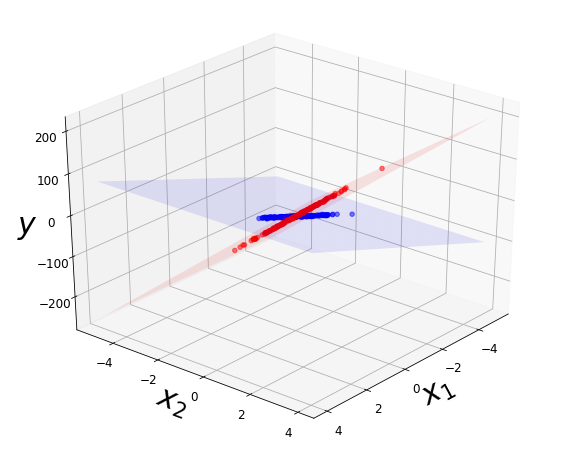

In [18]:
fig = plt.figure(figsize=(10, 8))

b = [0 for i in range(n)]

ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))

z1 = 0.0001 * np.array(xx) + w2* np.array(yy)
z2 = w1 * np.array(xx) + 0.0001*np.array(yy)
ax.scatter(X[0:200, 0],X[0:200, 1], y1, alpha=0.5, color='blue')
ax.scatter(X[200:400, 0],X[200:400, 1], y2, alpha=0.5, color='red')
#ax.scatter(y, x, z2, color='red')
#ax.scatter(y11, x, z2, color='red')
#ax.scatter(y22, x, z2, color='red')
ax.plot_surface(xx, yy, z1, alpha = 0.1, color = 'red')
ax.plot_surface(xx, yy, z2, alpha = 0.1, color = 'blue')
ax.view_init(30,40)
ax.set_xlabel('$x_1$', fontsize=30, fontweight="bold")
ax.set_ylabel('$x_2$', fontsize=30, fontweight="bold")
ax.set_zlabel('$y$', fontsize=30, fontweight="bold")
#ax.set_title('', fontsize=15, fontweight="bold")
pylab.savefig('experiment2_zeros.pdf')

#%mldev pylab